# Project 2 - Rodrigo Petricioli

### Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

### Upload Data

In [3]:
X = pd.read_csv('loan_X_train.csv', header=None)
y = pd.read_csv('loan_y_train.csv', header=None)

In [4]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0.844231,1.0,0.610440,0.590574,0.012039,0.001982,0.123596,0.000000,0.007958,0.590820,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.796610
1,0.348718,0.0,0.485002,0.330485,0.005111,0.002140,0.112360,0.000000,0.007318,0.435410,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.881356
2,0.871795,1.0,0.540319,0.586581,0.016663,0.001140,0.078652,0.011628,0.005096,0.310164,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.542373
3,0.282051,0.0,0.238411,0.243592,0.008681,0.001121,0.202247,0.000000,0.009839,0.241311,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.881356
4,0.179487,0.0,0.064277,0.144951,0.010082,0.000377,0.168539,0.000000,0.001766,0.041967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.593220


In [5]:
y[0].value_counts()

0    48449
1    48140
Name: 0, dtype: int64

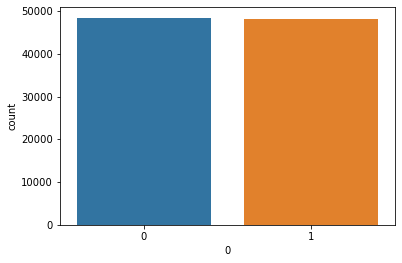

In [6]:
sns.countplot(x=y[0], data=y);

### Divide in Training and Testing Sets

In [7]:
#Convert to Numpy Arrays
X = X.to_numpy()
y = y.to_numpy()

In [8]:
np.random.seed(11235813) #Set seed to replicate results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((67612, 78), (28977, 78), (67612, 1), (28977, 1))

In [10]:
X_train.shape, type(X_train)

((67612, 78), numpy.ndarray)

## Model

In [11]:
model = Sequential()
model.add(Dense(units=78,activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(units=64,activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(units=128,activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [12]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [13]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=300,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop],
          batch_size =15000
          )

2021-12-02 21:44:55.607498: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-02 21:44:55.608100: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 67612 samples, validate on 28977 samples
Epoch 1/300
67612/67612 [==============================] - 2s 24us/sample - loss: 0.7350 - val_loss: 0.6593
Epoch 2/300
67612/67612 [==============================] - 1s 13us/sample - loss: 0.6926 - val_loss: 0.6268
Epoch 3/300
67612/67612 [==============================] - 1s 13us/sample - loss: 0.6631 - val_loss: 0.5937
Epoch 4/300
67612/67612 [==============================] - 1s 11us/sample - loss: 0.6325 - val_loss: 0.5557
Epoch 5/300
67612/67612 [==============================] - 1s 11us/sample - loss: 0.6053 - val_loss: 0.5168
Epoch 6/300
67612/67612 [==============================] - 1s 11us/sample - loss: 0.5760 - val_loss: 0.4847
Epoch 7/300
67612/67612 [==============================] - 1s 10us/sample - loss: 0.5538 - val_loss: 0.4599
Epoch 8/300
67612/67612 [==============================] - 1s 10us/sample - loss: 0.5322 - val_loss: 0.4405
Epoch 9/300
67612/67612 [==============================] - 1s 10us/sample - loss: 0.51

,loss,val_loss
98,0.366388,0.356787


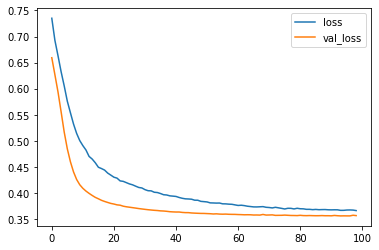

In [14]:
losses = pd.DataFrame(model.history.history)
losses.plot()
losses[-1:]

In [15]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80     14637
           1       0.79      0.82      0.81     14340

    accuracy                           0.80     28977
   macro avg       0.80      0.80      0.80     28977
weighted avg       0.80      0.80      0.80     28977



## Saving the Model

In [16]:
model.save("loan_project_model.h5")